In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib   #burada işlemlerin hızlı gerçekleşmesi adına tensorflow-gpu yüklemesi yapılıyor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [21]:
!pip list  #burada yüklü paketlerin isimlerini ve versiyonlarını yazdırıp istenilen yüklemelerin gerçekleşip gerçekleşmediğine bakıyoruz.

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
bs4                           0.0.1
CacheControl                  0.12.11
cachetools                    5.3.0
catalogue                     2.0.8
cert

In [22]:
import tensorflow as tf
import os     #Burada programlama sırasında kullanılacak tensorflow ve os modülllerini import ediyoruz

In [23]:
os.path.join('Dataset')
from google.colab import drive
drive.mount("/content/gdrive")      #Burada colab ile programlama sırasında kullanılcak verisetinin bulunduğu drive hesabının bağlantısını gerçekleştiriyoruz.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:

os.chdir("/content/gdrive/MyDrive/Dataset/malignant")  #Burada photos klasörüne erişim sağlıyoruz.

In [26]:
import numpy as np
from matplotlib import pyplot as plt # Burada programlama sırasında kullanılacak numpy ve matplotlib modüllerinin import işlemini yapıyoruz.

In [27]:
from tensorflow.keras.preprocessing import image #Burada tensorflow içinde bulunan image'i import ediyoruz

In [32]:
file = '/content/gdrive/MyDrive/Dataset/malignant//melanoma_5000.jpg'
img = image.load_img(file, target_size =(224,244)) # Yukarıda import edilen image ile üst satırda adresi verilen resmi yüklüyoruz.

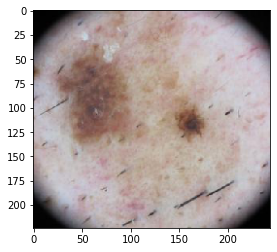

In [33]:
plt.imshow(img) #img ögesini matplotlib ile çıktıda gösteriyoruz.

In [35]:
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Dataset') #Kullanılacak verisetinin bulunduğu dosyaya erişerek içerik hakkında bilgi alıyoruz.

Found 9605 files belonging to 2 classes.


In [36]:
data_iterator = data.as_numpy_iterator()  # Burada verisetinin ögeleri numpy ögesine dönüştürülüyor.
batch = data_iterator.next() #Burada sürekli olarak bir sonraki elemana geçiş yapmak için next fonksiyonu kullanılıyor.
batch[0].shape #ögenin boyut bilgisini öğrenmek için kullanılıyor.

(32, 256, 256, 3)

In [37]:
batch[1] #Burada 0 ve 1'lerden oluşan array yazdırılıyor.

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int32)

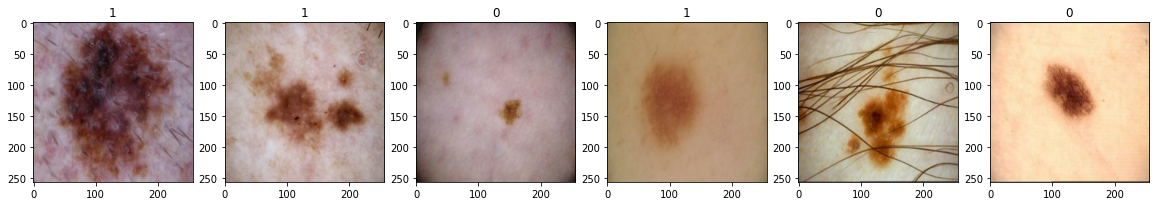

In [38]:
fig,ax = plt.subplots(ncols=6,figsize=(20,20)) #Bu kısımda örnek olarak 6 resim matplotlib ile çıktıda gösteriliyor. (0 başlıklı olanlar hatalı, 1 başlıklı olanlar sağlam)
for idx,img in enumerate(batch[0][:6]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [39]:
data = data.map(lambda x,y:(x/255,y))   #Burada veriler kullanıma daha uygun olacak şekilde yeniden boyutlandırılıyor.
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [40]:
batch[0].max() #Burada kontrol amaçlı yeni boyutlandırmada bulunan en yüksek değer yazdırılıyor.

1.0

In [49]:
train_size = int(len(data)* .10) + 1  #Burada veriler train,test ve validation olarak 3 gruba ayrıldığında sahip olacakları büyüklükler belirleniyor.
test_size = int(len(data)*0.1)
val_size = int(len(data)*0.2)

train_size + test_size + val_size

121

In [50]:
train = data.take(train_size) #Burada gruplara yukarıdan belirlenmiş boyutlarına uygun olacak şekilde veriler dağıtılıyor.
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [51]:
from tensorflow.keras.models import Sequential  #Burada tensorflow içinde bulunan ve model oluşturmada kullanılacak classlar import ediliyor.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [52]:
model = Sequential() #Sequential class'ından bir model nesnesi türetiliyor.

In [53]:
model.add(Conv2D(16, (3,3),1,activation="relu", input_shape=(256,256,3))) #giriş katmanı
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),1,activation="relu")) # gizli katmanlar
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten()) #matrislerden vektörlere dönüştürme işlemi için flatten katmanı

model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid")) #çıkış katmanı

#Not: Burada katmanların sahip oldukları filters değerleri başarı durumuna göre denemelerle belirlenmiştir.
#Not: Aktivasyon fonksiyonu olarak yaygın kullanımı ve başarısı nedeniyle relu seçilmiştir.
#Not: Çıktıda 0 ve 1 aralığında bir sonuç alabilmek için sigmoid fonksiyonu kullanılmıştır.

In [54]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy']) #modelin derlenmesi için compile fonksiyonu kullanılır. Optimizer olarak Adam tercih edildi.

In [55]:
model.summary() #Oluşturulan model hakkında bilgiler burada çıktıya yazdırılıyor

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)      

In [58]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback]) #Burada modelin eğitimi gerçekleştiriliyor.

Epoch 1/10
31/31 [==============================] - 13s 425ms/step - loss: 0.4350 - accuracy: 0.7903 - val_loss: 0.3690 - val_accuracy: 0.8620
Epoch 2/10
31/31 [==============================] - 9s 289ms/step - loss: 0.4063 - accuracy: 0.8216 - val_loss: 0.3489 - val_accuracy: 0.8609
Epoch 3/10
31/31 [==============================] - 10s 324ms/step - loss: 0.3655 - accuracy: 0.8397 - val_loss: 0.3205 - val_accuracy: 0.8859
Epoch 4/10
31/31 [==============================] - 13s 421ms/step - loss: 0.3106 - accuracy: 0.8518 - val_loss: 0.4649 - val_accuracy: 0.8245
Epoch 5/10
31/31 [==============================] - 10s 312ms/step - loss: 0.3290 - accuracy: 0.8579 - val_loss: 0.3033 - val_accuracy: 0.8734
Epoch 6/10
31/31 [==============================] - 13s 425ms/step - loss: 0.2682 - accuracy: 0.8821 - val_loss: 0.2944 - val_accuracy: 0.8818
Epoch 7/10
31/31 [==============================] - 13s 422ms/step - loss: 0.2490 - accuracy: 0.8962 - val_loss: 0.2912 - val_accuracy: 0.8750


In [59]:
import cv2 #Opencv import ediliyor

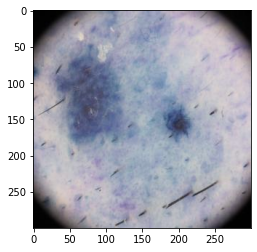

In [61]:
img1 = cv2.imread('/content/gdrive/MyDrive/Dataset/malignant//melanoma_5000.jpg') #Burada verisetinden örnek bir veri kullanılıyor
plt.imshow(img1)
plt.show()

In [62]:
resize = tf.image.resize(img1,(256,256)) #yukarıdaki resim yeniden boyutlandırılıp uygun bir hale getiriliyor.
resize.shape

TensorShape([256, 256, 3])

In [63]:
yhat = model.predict(np.expand_dims(resize/255,0)) #Burada yukarıdaki resim hakkında bir tahmin sonucu dönüyor.
print("%.17f" %yhat)

1/1 [==============================] - 1s 511ms/step
1.00000000000000000


In [64]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [65]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [66]:
res = []
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = new_model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)
  res.append(tf.math.confusion_matrix(y.round(),yhat))

NameError: ignored

In [ ]:
print(pre.result().numpy())
print(sum(res))

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join("models","imgclass.h5"))